In [1]:
# imports
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer

## Get S&P500 and VIX index data from 1-7-2019 to 16-09-2020

In [2]:
start = datetime.datetime(2019, 7, 1)
end = datetime.datetime(2020, 9, 16)

df_sp500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_vix = web.DataReader("^VIX", 'yahoo', start, end)
df_sp500.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,2977.929932,2952.219971,2971.409912,2964.330078,3513270000,2964.330078
2019-07-02,2973.209961,2955.919922,2964.659912,2973.010010,3206840000,2973.010010
2019-07-03,2995.840088,2977.959961,2978.080078,2995.820068,1963720000,2995.820068
2019-07-05,2994.030029,2967.969971,2984.250000,2990.409912,2434210000,2990.409912
2019-07-08,2980.760010,2970.090088,2979.770020,2975.949951,2904550000,2975.949951


<AxesSubplot:>

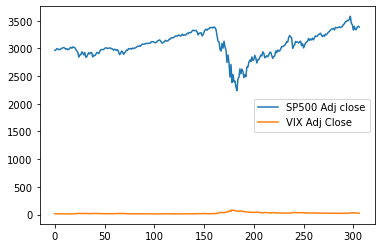

In [3]:
df = pd.DataFrame(np.array(df_sp500['Adj Close']), columns = ['SP500 Adj close'])
df.insert(loc=1, value=np.array(df_vix['Adj Close']), column='VIX Adj Close')
df.plot()

## Scale data

In [4]:
#standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
#robust_scaler = RobustScaler()
#quantile_transformer = QuantileTransformer()
#power_transformer = PowerTransformer()
#normalizer = Normalizer()

scaled_data = min_max_scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns = ['SP500 Adj close', 'VIX Adj close'])
df_scaled.tail(5)

,SP500 Adj close,VIX Adj close
302,0.820126,0.255376
303,0.821451,0.215460
304,0.853138,0.201124
305,0.866283,0.197470
306,0.854590,0.203795


In [5]:
df_sp500 = df_sp500.reset_index()
df_scaled.insert(loc=1, value=df_sp500['Date'], column='Date')
df_scaled.set_index('Date')
df_scaled.head(5)

,SP500 Adj close,Date,VIX Adj close
0,0.541096,2019-07-01,0.035418
1,0.547557,2019-07-02,0.019536
2,0.564536,2019-07-03,0.014476
3,0.560509,2019-07-05,0.024455
4,0.549745,2019-07-08,0.034013


## Figure shows that volatility is low before the crash, so it's a poor indicator for the market shocks.
## Data is few months before and after the COVID-19 market drop event.

Text(0.5, 1.0, 'S&P500 and VIX indices (results are scaled)')

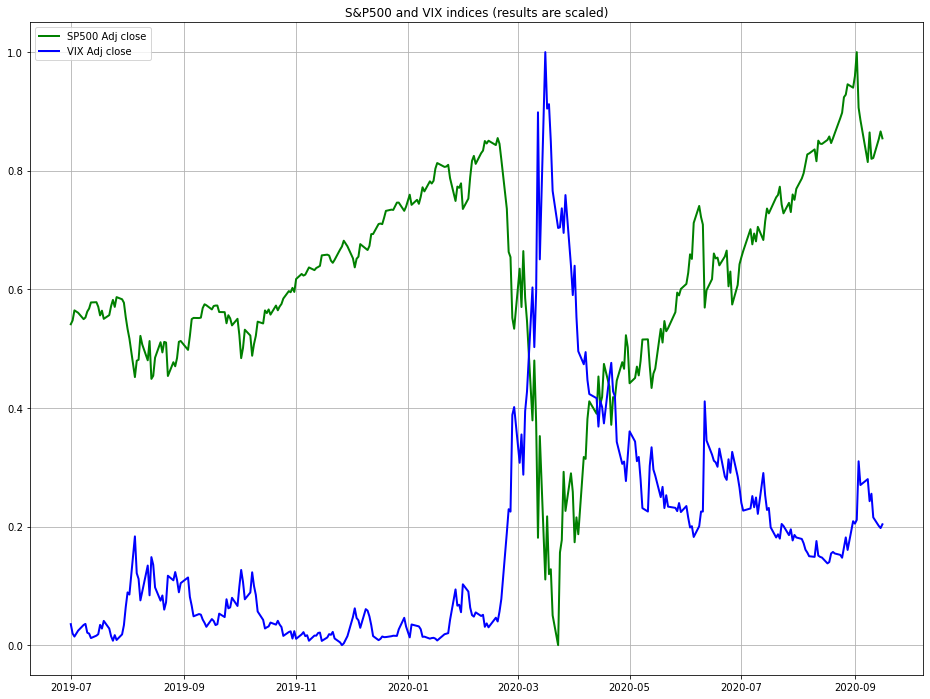

In [6]:
fig, axe = plt.subplots(figsize=(16, 12))

plt.plot(df_scaled['Date'], df_scaled['SP500 Adj close'], lw=2, color='green', label='SP500 Adj close')
plt.plot(df_scaled['Date'], df_scaled['VIX Adj close'], lw=2, color='blue', label='VIX Adj close')
plt.legend(loc=0)
plt.grid(True)
plt.title('S&P500 and VIX indices (results are scaled)')